# Face Detection

In [2]:
import wget
import youtube_dl

wget.download('http://dlib.net/files/mmod_human_face_detector.dat.bz2')
wget.download('http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2')


[youtube] 2H_1K3aY2YI: Downloading webpage
[youtube] 2H_1K3aY2YI: Downloading video info webpage
[download] Destination: [Faker's View] SKT vs RNG _ Faker's TwistedFate_ Worlds 2019 Groups Day 2-2H_1K3aY2YI.mp4
[download] 100% of 469.34MiB in 00:31                  


In [3]:
import dlib
import matplotlib.pyplot as plt
from imutils import face_utils
import numpy as np
import imutils
import cv2
%matplotlib inline

detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

f = 'mars'
ext = '.jpg'
image = cv2.imread(f+ext)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_copy = image.copy()

# detect faces in the grayscale image
dets = detector(gray, 1)
print(f'faces: {len(dets)}')

(l1, l2) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(r1, r2) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

faces: 0


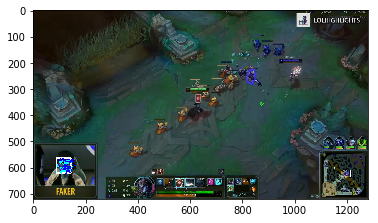

In [5]:
for (i, rect) in enumerate(dets):

    x1 = rect.rect.left()
    y1 = rect.rect.top()
    x2 = rect.rect.right()
    y2 = rect.rect.bottom()

    # Rectangle around the face
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 255), 3)
    dlib_rect = dlib.rectangle(int(x1), int(y1), int(x2), int(y2))  
    
    detected_landmarks = predictor(gray, dlib_rect).parts()
  
    landmarks = np.matrix([[p.x, p.y] for p in detected_landmarks])  
    # copying the image so we can see side-by-side  
    image_copy = image.copy()  
   
    for idx, point in enumerate(landmarks):  
        pos = (point[0, 0], point[0, 1])  
        # annotate the positions  
        cv2.putText(image_copy, str(idx), pos,  fontFace=cv2.FONT_HERSHEY_SIMPLEX,  fontScale=0.4,  color=(0, 0, 255))  
        # draw points on the landmark positions  
        cv2.circle(image_copy, pos, 3, color=(0, 255, 255))  

plt.imshow(image_copy)
plt.savefig(f+'-features'+ext, dpi=300)

In [11]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import imutils
import time
import dlib
import cv2

filename = 'c:\\tmp\\c9\\faker_trim.mp4'
vs = FileVideoStream(filename).start()
fileStream = True
time.sleep(1.0)
(l1, l2) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(r1, r2) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
COUNTER = 0
TOTAL = 0

while True:
    # if this is a file video stream, then we need to check if
    # there any more frames left in the buffer to process
    if fileStream and not vs.more():
        break

    # grab the frame from the threaded video file stream, resize
    # it, and convert it to grayscale
    # channels)
    frame = vs.read()
    (h, w, c) = frame.shape
    frame = frame[h-300:h,0:360]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale frame
    rects = detector(gray, 0)
    
    # loop over the face detections
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # extract the left and right eye coordinates, then use the
        # coordinates to compute the eye aspect ratio for both eyes
        leftEye = shape[l1:l2]
        rightEye = shape[r1:r2]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        # average the eye aspect ratio together for both eyes
        ear = (leftEAR + rightEAR) / 2.0

        # compute the convex hull for the left and right eye, then
        # visualize each of the eyes
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        # check to see if the eye aspect ratio is below the blink
        # threshold, and if so, increment the blink frame counter
        if ear < EYE_AR_THRESH:
            COUNTER += 1

        # otherwise, the eye aspect ratio is not below the blink
        # threshold
        else:
            # if the eyes were closed for a sufficient number of
            # then increment the total number of blinks
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                TOTAL += 1

            # reset the eye frame counter
            COUNTER = 0

        # draw the total number of blinks on the frame along with
        # the computed eye aspect ratio for the frame
        cv2.putText(frame, "Blinks: {}".format(TOTAL), (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # show the frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

AttributeError: 'NoneType' object has no attribute 'shape'

In [17]:
import numpy as np  
import cv2  
import dlib  
from scipy.spatial import distance as dist 
from imutils.video import FileVideoStream
   
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"  
RIGHT_EYE_POINTS = list(range(36, 42)) 
LEFT_EYE_POINTS = list(range(42, 48))  
   
EYE_AR_THRESH = 0.2 
EYE_AR_CONSEC_FRAMES = 2  
frame_c=0   
COUNTER_LEFT = 0  
TOTAL_LEFT = 0  
   
COUNTER_RIGHT = 0  
TOTAL_RIGHT = 0  
   
def eye_aspect_ratio(eye):  
    A = dist.euclidean(eye[1], eye[5])  
    B = dist.euclidean(eye[2], eye[4])  
    C = dist.euclidean(eye[0], eye[3])  
    ear = (A + B) / (2.0 * C)  
    return ear  
   
detector = dlib.get_frontal_face_detector()  
predictor = dlib.shape_predictor(PREDICTOR_PATH)  
   
filename = 'c:\\tmp\\c9\\faker_trim.mp4'
vs = FileVideoStream(filename).start()
fileStream = True
   
while True:
   
    if fileStream and not vs.more():
        break
    frame = vs.read()
    (h, w, c) = frame.shape
    frame = frame[h-300:h,0:360]
    #frame = imutils.resize(frame, width=520)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
   
    rects = detector(gray, 0)  
    
    for rect in rects:  
        x = rect.left()  
        y = rect.top()  
        landmarks = np.matrix([[p.x, p.y] for p in predictor(frame, rect).parts()])  
        left_eye = landmarks[LEFT_EYE_POINTS]  
        right_eye = landmarks[RIGHT_EYE_POINTS]  
        left_eye_hull = cv2.convexHull(left_eye)  
        right_eye_hull = cv2.convexHull(right_eye)  
        cv2.drawContours(frame, [left_eye_hull], -1, (0, 255, 0), 1)  
        cv2.drawContours(frame, [right_eye_hull], -1, (0, 255, 0), 1)  
        ear_left = eye_aspect_ratio(left_eye)  
        ear_right = eye_aspect_ratio(right_eye)  
   
        cv2.putText(frame, "E.A.R. Left : {:.2f}".format(ear_left), (300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)  
        cv2.putText(frame, "E.A.R. Right: {:.2f}".format(ear_right), (300, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)  
   
        if ear_left < EYE_AR_THRESH:  
            COUNTER_LEFT += 1  
        else:  
            if COUNTER_LEFT >= EYE_AR_CONSEC_FRAMES:  
                TOTAL_LEFT += 1  
                print("Left eye winked")  
            COUNTER_LEFT = 0  
   
        if ear_right < EYE_AR_THRESH:  
            COUNTER_RIGHT += 1  
        else:  
            if COUNTER_RIGHT >= EYE_AR_CONSEC_FRAMES:  
                TOTAL_RIGHT += 1  
                print("Right eye winked")
            COUNTER_RIGHT = 0  
   
        cv2.putText(frame, "Wink Left : {}".format(TOTAL_LEFT), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)   
        cv2.putText(frame, "Wink Right: {}".format(TOTAL_RIGHT), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)  
   
        cv2.imshow("Faces found", frame)  
   
    ch = 0xFF & cv2.waitKey(1)  
   
    if ch == ord('q'):  
        break  

cv2.destroyAllWindows()  

Left eye winked
Left eye winked
Right eye winked
Right eye winked
Left eye winked
Right eye winked
Left eye winked
Left eye winked
Right eye winked
Left eye winked
Right eye winked
Left eye winked
Right eye winked
Left eye winked
Right eye winked
Left eye winked
Left eye winked


KeyboardInterrupt: 